In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
OUTDATED_RAISE_EXCEPTION=1
OUTDATED_IGNORE=1

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-androsova/Family Income and Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


### Для дальнейшего анализа сократим количество колонок и оставим те, что представляют интерес для исследования

In [3]:
df = df[['Total Household Income', 'Region', 'Total Food Expenditure', 'Main Source of Income', 'Restaurant and hotels Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Imputed House Rental Value', 'Medical Care Expenditure', 'Education Expenditure', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 'Household Head Occupation', 'Household Head Class of Worker', 'Type of Household', 'Total Number of Family members', 'Total number of family members employed', 'Number of Car, Jeep, Van']]
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Restaurant and hotels Expenditure,"Clothing, Footwear and Other Wear Expenditure",Imputed House Rental Value,Medical Care Expenditure,Education Expenditure,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Total number of family members employed,"Number of Car, Jeep, Van"
0,480332,CAR,117848,Wage/Salaries,3000,4607,30000,3457,36200,Female,49,Single,Teacher Training and Education Sciences Programs,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,1,0
1,198235,CAR,67766,Wage/Salaries,2360,8230,27000,3520,29300,Male,40,Married,Transport Services Programs,Transport conductors,Worked for private establishment,Single Family,3,2,0
2,82785,CAR,61609,Wage/Salaries,4545,2735,7200,70,425,Male,39,Married,Grade 3,Farmhands and laborers,Worked for private establishment,Single Family,6,3,0
3,107589,CAR,78189,Wage/Salaries,6280,1390,6600,60,300,Male,52,Married,Elementary Graduate,Rice farmers,Employer in own family-operated farm or business,Single Family,3,2,0
4,189322,CAR,94625,Wage/Salaries,6400,4620,16800,140,0,Male,65,Married,Elementary Graduate,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,2,0


### Описание данных

Данные представляют собой выборку из общего числа филиппинских домохозяйств. В датасете 41544 строки: это достаточно большая выборка, значит выводы о генеральной совокупности будут более надежными.

Единица наблюдения - отдельное филиппинское домохозяйство

Качественные номинальные переменные: Region; Main Source of Income; Household Head Sex; Household Head Marital Status; Household Head Highest Grade Completed; Household Head Occupation; Household Head Class of Worker

Качественные ординальные переменные: Type of Household

Количественные дискретные переменные: Household Head Age; Total Number of Family members; Total number of family members employed; Number of Car, Jeep, Van

Количественные непрерывные переменные: Total Household Income; Total Food Expenditure; Restaurant and hotels Expenditure; Clothing, Footwear and Other Wear Expenditure; Imputed House Rental Value; Medical Care Expenditure; Education Expenditure

### Посчитаем описательную статистику и построим графики

#### Для начала посмотрим на распределение доходов домохозяйств

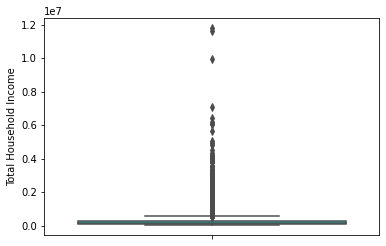

In [4]:
sns.boxplot(data = df, y = 'Total Household Income', color = 'cyan')

#### Данные обладают большим количеством выбросов. Для дальнейшего анализа удалим экстремальные значения

In [5]:
print(df['Total Household Income'].quantile(0.25))
print(df['Total Household Income'].quantile(0.75))

104895.0
291138.5


In [6]:
df= df[(df['Total Household Income'] > (104895.0 - 1.5*(291138.5 - 104895.0))) \
                      & (df['Total Household Income'] < (291138.5 + 1.5*(291138.5 - 104895.0)))]
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Restaurant and hotels Expenditure,"Clothing, Footwear and Other Wear Expenditure",Imputed House Rental Value,Medical Care Expenditure,Education Expenditure,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Total number of family members employed,"Number of Car, Jeep, Van"
0,480332,CAR,117848,Wage/Salaries,3000,4607,30000,3457,36200,Female,49,Single,Teacher Training and Education Sciences Programs,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,1,0
1,198235,CAR,67766,Wage/Salaries,2360,8230,27000,3520,29300,Male,40,Married,Transport Services Programs,Transport conductors,Worked for private establishment,Single Family,3,2,0
2,82785,CAR,61609,Wage/Salaries,4545,2735,7200,70,425,Male,39,Married,Grade 3,Farmhands and laborers,Worked for private establishment,Single Family,6,3,0
3,107589,CAR,78189,Wage/Salaries,6280,1390,6600,60,300,Male,52,Married,Elementary Graduate,Rice farmers,Employer in own family-operated farm or business,Single Family,3,2,0
4,189322,CAR,94625,Wage/Salaries,6400,4620,16800,140,0,Male,65,Married,Elementary Graduate,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,2,0


In [7]:
def statistics(x):
    return round(x.min(), 2), round(x.max(), 2), round(x.max() - x.min(), 2), round(x.mean(), 2), round(x.median(), 2), round(x.var(), 2), round(x.std(), 2), round(x.std()/x.mean()*100, 2), round(x.mode(), 2)
desc_stat = df[['Total Household Income', 'Total Food Expenditure', 'Restaurant and hotels Expenditure', 
                'Clothing, Footwear and Other Wear Expenditure', 'Imputed House Rental Value', 
                'Medical Care Expenditure', 'Education Expenditure', 'Household Head Age', 
                'Total Number of Family members', 'Total number of family members employed', 
                'Number of Car, Jeep, Van']].apply(statistics)
desc_stat.index = ['Min', 'Max', 'Var_range', 'Mean', 'Median', 'Var', 'Std', 'Var_coef', 'Mode']
desc_stat

,Total Household Income,Total Food Expenditure,Restaurant and hotels Expenditure,"Clothing, Footwear and Other Wear Expenditure",Imputed House Rental Value,Medical Care Expenditure,Education Expenditure,Household Head Age,Total Number of Family members,Total number of family members employed,"Number of Car, Jeep, Van"
Min,11285,2947,0,0,0,0,0,9,1,0,0
Max,570492,827565,725296,100972,360000,603695,275000,99,26,8,5
Var_range,559207,824618,725296,100972,360000,603695,275000,90,25,8,5
Mean,189886,77306.9,12573.1,3897.22,15964.3,5203.4,5213.24,51.08,4.58,1.22,0.03
Median,153175,69648,6340,2504,9000,960,800,50,4,1,0
Var,1.45327e+10,1.61833e+09,3.35826e+08,2.06925e+07,3.4721e+08,2.65818e+08,1.57964e+08,203.99,5.09,1.23,0.04
Std,120552,40228.5,18325.5,4548.9,18633.6,16303.9,12568.4,14.28,2.26,1.11,0.21
Var_coef,63.49,52.04,145.75,116.72,116.72,313.33,241.09,27.96,49.26,91.02,593.68
Mode,0 146320 1 156600 2 170400 dtype: int64,0 51702 1 52969 2 65194 3 89925 dt...,0 0 dtype: int64,0 0 dtype: int64,0 6000 dtype: int64,0 0 dtype: int64,0 0 dtype: int64,0 46 dtype: int64,0 4 dtype: int64,0 1 dtype: int64,0 0 dtype: int64


In [8]:
def quantiles(x):
    return round(x.quantile(0.25), 2), round(x.quantile(0.5), 2), round(x.quantile(0.75), 2)
desc_quantiles = df[['Total Household Income', 'Total Food Expenditure', 'Restaurant and hotels Expenditure', 
                'Clothing, Footwear and Other Wear Expenditure', 'Imputed House Rental Value', 
                'Medical Care Expenditure', 'Education Expenditure', 'Household Head Age', 
                'Total Number of Family members', 'Total number of family members employed', 
                'Number of Car, Jeep, Van']].apply(quantiles)
desc_quantiles.index = ['25%', '50%_median', '75%']
desc_quantiles

,Total Household Income,Total Food Expenditure,Restaurant and hotels Expenditure,"Clothing, Footwear and Other Wear Expenditure",Imputed House Rental Value,Medical Care Expenditure,Education Expenditure,Household Head Age,Total Number of Family members,Total number of family members employed,"Number of Car, Jeep, Van"
25%,101150.0,49262.0,1695.0,1285.0,5400.0,270.0,0.0,40.0,3.0,0.0,0.0
50%_median,153175.0,69648.0,6340.0,2504.0,9000.0,960.0,800.0,50.0,4.0,1.0,0.0
75%,250795.0,97231.0,16920.0,4809.0,21000.0,3680.0,3080.0,61.0,6.0,2.0,0.0


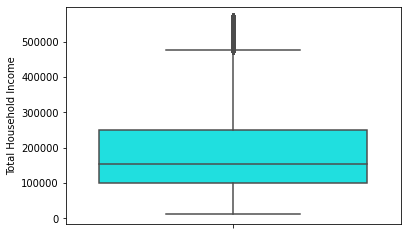

In [9]:
sns.boxplot(data =df, y = 'Total Household Income', color= 'cyan')

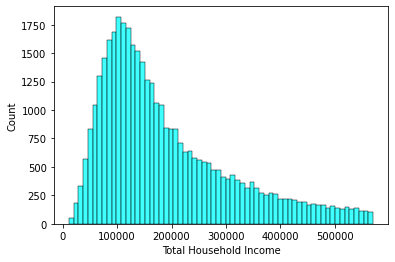

In [10]:
sns.histplot(data = df, x = 'Total Household Income', color = 'cyan')

#### Гипотеза H0: распределение дохода домохозяйств является нормальным
#### Альтернативная гипотеза H1: распределение дохода домохозяйств не является нормальным

In [11]:
stats.shapiro(df['Total Household Income'])

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8939328789710999, pvalue=0.0)

#### Тест Шапиро-Уилка при большой выборке (N>5000) может предоставить неточный p-value. Проведем другой тест на нормальность распределения:

In [12]:
stats.normaltest(df['Total Household Income'])

NormaltestResult(statistic=5805.911851067667, pvalue=0.0)

#### Оба теста показали крайне малое p-value, которое меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что распределение дохода домохозяйств является нормальным, отвергается

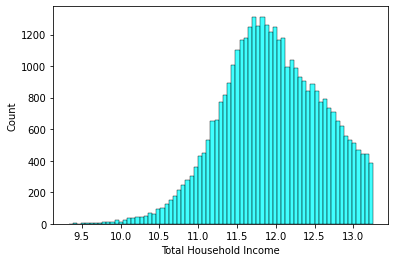

In [13]:
log = pd.DataFrame(np.log(df['Total Household Income']))
sns.histplot(data = log, x = 'Total Household Income', color = 'cyan')

In [14]:
stats.shapiro(log)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9914565086364746, pvalue=2.530885156417052e-41)

In [15]:
stats.normaltest(log)

NormaltestResult(statistic=array([318.36078961]), pvalue=array([7.39320775e-70]))

#### Оба теста снова показали крайне малое p-value, которое меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что распределение дохода домохозяйств является нормальным, отвергается

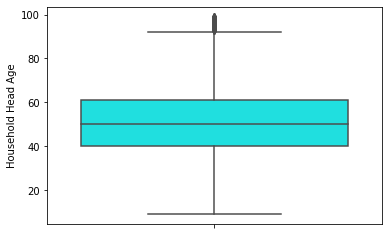

In [16]:
sns.boxplot(data = df, y = 'Household Head Age', color = 'cyan')

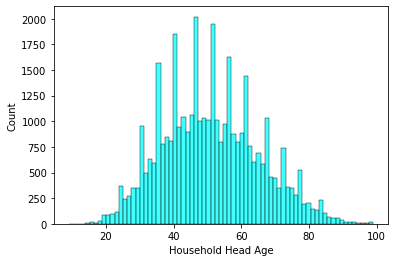

In [17]:
sns.histplot(data = df, x = 'Household Head Age', color = 'cyan')

#### Гипотеза H0: распределение возрастов главы семьи является нормальным
#### Альтернативная гипотеза H1: распределение возрастов главы семьи не является нормальным

In [18]:
stats.shapiro(df['Household Head Age'])

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9911834001541138, pvalue=7.812238938610855e-42)

In [19]:
stats.normaltest(df['Household Head Age'])

NormaltestResult(statistic=849.1889183699524, pvalue=3.989967234336271e-185)

#### Оба теста показали крайне малое p-value, которое меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что распределение возрастов главы семьи является нормальным, отвергается

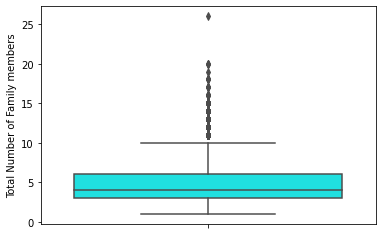

In [20]:
sns.boxplot(data = df, y = 'Total Number of Family members', color = 'cyan')

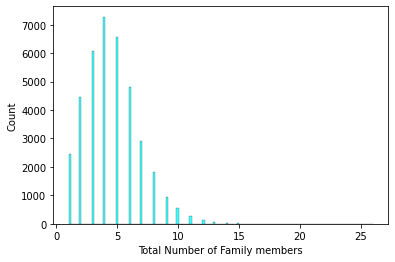

In [21]:
sns.histplot(data = df, x = 'Total Number of Family members', color = 'cyan')

#### Гипотеза H0: распределение числа членов семьи является нормальным
#### Альтернативная гипотеза H1: распределение числа членов семьи не является нормальным

In [22]:
stats.shapiro(df['Total Number of Family members'])

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9456905722618103, pvalue=0.0)

In [23]:
stats.normaltest(df['Total Number of Family members'])

NormaltestResult(statistic=4575.701894489449, pvalue=0.0)

#### Оба теста показали крайне малое p-value, которое меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что распределение числа членов семьи является нормальным, отвергается

### Построим доверительные интервалы для средних разных параметров

In [24]:
sms.DescrStatsW(df['Total Household Income']).tconfint_mean()

(188679.81249326782, 191091.59661776805)

In [25]:
sms.DescrStatsW(df['Total Food Expenditure']).tconfint_mean()

(76904.48856905167, 77709.30946704868)

In [26]:
sms.DescrStatsW(df['Restaurant and hotels Expenditure']).tconfint_mean()

(12389.754657544012, 12756.38031497702)

In [27]:
sms.DescrStatsW(df['Clothing, Footwear and Other Wear Expenditure']).tconfint_mean()

(3851.716694401715, 3942.7231774499246)

In [28]:
sms.DescrStatsW(df['Imputed House Rental Value']).tconfint_mean()

(15777.892626474923, 16150.680498834377)

In [29]:
sms.DescrStatsW(df['Medical Care Expenditure']).tconfint_mean()

(5040.30507859387, 5366.485482185439)

In [30]:
sms.DescrStatsW(df['Education Expenditure']).tconfint_mean()

(5087.518086164296, 5338.964449714641)

### Для ответа на вопрос исследования проведем дополнительные тесты

#### Гипотеза H0: средний доход в семьях с женщиной как главой семьи и средний доход с мужчиной как главой семьи не отличаются
#### Альтернативная гипотеза H1: средний доход в семьях с женщиной как главой семьи и средний доход с мужчиной как главой семьи отличаются

In [31]:
pg.ttest(df[df['Household Head Sex'] == 'Male']['Total Household Income'], df[df['Household Head Sex'] == 'Female']['Total Household Income'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.272831,12026.773975,two-sided,3.667052e-10,"[-13165.92, -6896.67]",0.083259,4.81e+06,1.0


#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что средний доход в семьях с женщиной как главой семьи и средний доход с мужчиной как главой семьи не отличаются, отвергается

### Дисперсионный анализ

#### Гипотеза H0: дисперсии дохода семьи в разрезе пола главы семьи статистически значимо не различаются
#### Альтернативная гипотеза H1: дисперсии дохода семьи в разрезе пола главы семьи статистически значимо различаются

In [32]:
pg.homoscedasticity(data = df, dv = 'Total Household Income', group = 'Household Head Sex')

,W,pval,equal_var
levene,217.331656,4.706891e-49,False


#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что дисперсии дохода семьи в разрезе пола главы семьи статистически значимо не различаются, отвергается

#### При разнородных дисперсиях используем критерий Уэлча

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: средний доход в семьях с женщиной как главой семьи и средний доход с мужчиной как главой семьи не отличаются
#### Альтернативная гипотеза H1: средний доход в семьях с женщиной как главой семьи и средний доход с мужчиной как главой семьи отличаются

In [33]:
pg.welch_anova(data= df, dv="Total Household Income", between="Household Head Sex")

,Source,ddof1,ddof2,F,p-unc,np2
0,Household Head Sex,1,12026.773975,39.348405,3.667052e-10,0.001166


#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что дисперсии дохода семьи в разрезе пола главы семьи статистически значимо не различаются, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: средние затраты семьи на медицинское обслуживание и средние затраты на образование не отличаются
#### Альтернативная гипотеза H1: средние затраты семьи на медицинское обслуживание и средние затраты на образование отличаются

In [34]:
pg.ttest(df['Medical Care Expenditure'], df['Education Expenditure'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.093716,76784,two-sided,0.925335,"[-215.77, 196.07]",0.000676,0.008,0.051007


#### p-value больше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что средние затраты семьи на медицинское обслуживание и средние затраты на образование не отличаются, принимается

In [35]:
pg.ttest(df['Medical Care Expenditure'], df['Education Expenditure'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.093716,76784,two-sided,0.925335,"[-215.77, 196.07]",0.000676,0.008,0.051007


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и затратами семьи на еду равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и затратами семьи на еду не равен 0

In [36]:
st.pearsonr(df['Total Household Income'], df['Total Food Expenditure'])

(0.7174059527857577, 0.0)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и затратами семьи на еду равен 0, отвергается

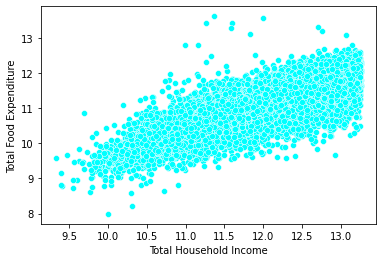

In [37]:
sns.scatterplot(data = df, x = np.log(df['Total Household Income']), y = np.log(df['Total Food Expenditure']), color = 'cyan')

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и затратами семьи на медицинское обслуживание равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и затратами семьи на медицинское обслуживание не равен 0

In [38]:
st.pearsonr(df['Total Household Income'], df['Medical Care Expenditure'])

(0.26312647564140296, 0.0)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и затратами семьи на медицинское обслуживание равен 0, отвергается

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


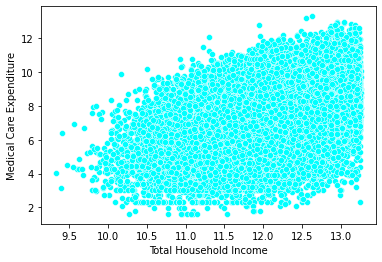

In [39]:
sns.scatterplot(data = df, x = np.log(df['Total Household Income']), y = np.log(df['Medical Care Expenditure']), color = 'cyan')

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и затратами семьи на одежду равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и затратами семьи на одежду не равен 0

In [40]:
st.pearsonr(df['Total Household Income'], df['Clothing, Footwear and Other Wear Expenditure'])

(0.5519624700078216, 0.0)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и затратами семьи на одежду равен 0, отвергается

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


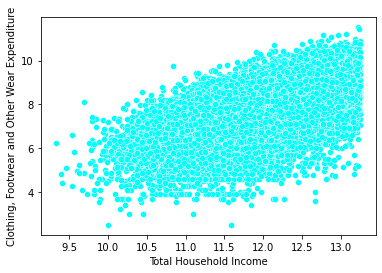

In [41]:
sns.scatterplot(data = df, x = np.log(df['Total Household Income']), y = np.log(df['Clothing, Footwear and Other Wear Expenditure']), color = 'cyan')

#### Гипотеза H0: коэффициент корреляции между числом членов семьи и затратами семьи на образование равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между числом членов семьи и затратами семьи на образование не равен 0

In [42]:
st.pearsonr(df['Total Number of Family members'], df['Education Expenditure'])

(0.10666780887915928, 1.5282401092619516e-97)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между числом членов семьи и затратами семьи на образование равен 0, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и возрастом главы семьи равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и возрастом главы семьи не равен 0

In [43]:
st.pearsonr(df['Total Household Income'], df['Household Head Age'])

(0.03877241897421214, 2.967516507069152e-14)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и возрастом главы семьи равен 0, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и числом членов семьи равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и числом членов семьи не равен 0

In [44]:
st.pearsonr(df['Total Household Income'], df['Total Number of Family members'])

(0.21339514512404248, 0.0)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и числом членов семьи равен 0, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: коэффициент корреляции между доходом домохозяйства и числом автомобилей в семье равен 0
#### Альтернативная гипотеза H1: коэффициент корреляции между доходом домохозяйства и числом автомобилей в семье не равен 0

In [45]:
st.pearsonr(df['Number of Car, Jeep, Van'], df['Total Household Income'])

(0.2649163995180558, 0.0)

#### p-value меньше a = 0.05
#### При уровне значимости a = 0.05 нулевая гипотеза о том, что коэффициент корреляции между доходом домохозяйства и числом автомобилей в семье равен 0, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: связь между полом главы семьи и основным источников дохода в семье статистически не значима
#### Альтернативная гипотеза H1: связь между полом главы семьи и основным источников дохода в семье статистически значима

In [46]:
contingency_table = pd.crosstab(df['Household Head Sex'], df['Main Source of Income'])
contingency_table

Main Source of Income,Enterpreneurial Activities,Other sources of Income,Wage/Salaries
Household Head Sex,,,
Female,1231,3898,3095
Male,8567,6101,15501


In [47]:
chi2_contingency(contingency_table)[1]

0.0

#### p-value = 0.0 < a = 0.05     
#### Значит, при уровне значимости 5% нулевая гипотеза о том, что связь между полом главы семьи и основным источников дохода в семье статистически не значима, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: связь между полом главы семьи и ее семейным положением статистически не значима
#### Альтернативная гипотеза H1: связь между полом главы семьи и ее семейным положением статистически значима

In [48]:
contingency_table = pd.crosstab(df['Household Head Sex'], df['Household Head Marital Status'])
contingency_table

Household Head Marital Status,Annulled,Divorced/Separated,Married,Single,Unknown,Widowed
Household Head Sex,,,,,,
Female,5,711,1714,795,1,4998
Male,2,626,27153,1031,0,1357


In [49]:
chi2_contingency(contingency_table)[1]

0.0

#### p-value = 0.0 < a = 0.05     
#### Значит, при уровне значимости 5% нулевая гипотеза о том, что связь между полом главы семьи и ее семейным положением статистически не значима, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Гипотеза H0: связь между полом главы семьи и ее образованием статистически не значима
#### Альтернативная гипотеза H1: связь между полом главы семьи и ее образованием статистически значима

In [50]:
contingency_table = pd.crosstab(df['Household Head Sex'], df['Household Head Highest Grade Completed'])
contingency_table

Household Head Highest Grade Completed,"Agriculture, Forestry, and Fishery Programs",Architecture and Building Programs,Arts Programs,Basic Programs,Business and Administration Programs,Computing/Information Technology Programs,Elementary Graduate,Engineering and Engineering Trades Programs,Engineering and Engineering trades Programs,Environmental Protection Programs,...,Second Year High School,Second Year Post Secondary,Security Services Programs,Social Services Programs,Social and Behavioral Science Programs,Teacher Training and Education Sciences Programs,Third Year College,Third Year High School,Transport Services Programs,Veterinary Programs
Household Head Sex,,,,,,,,,,,,,,,,,,,,,
Female,21,2,3,3,450,46,1726,26,6,0,...,419,15,3,9,26,432,160,255,2,1
Male,138,14,11,19,478,194,5751,436,458,6,...,1643,110,165,0,63,258,612,1244,185,3


In [51]:
chi2_contingency(contingency_table)[1]

0.0

#### p-value = 0.0 < a = 0.05     
#### Значит, при уровне значимости 5% нулевая гипотеза о том, что связь между полом главы семьи и ее образованием статистически не значима, отвергается

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [52]:
x = np.array(df['Total Household Income']).reshape((-1, 1))
y = np.array(df['Total Food Expenditure'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.51
intercept: 31848.09
slope: [0.23940091]


#### Данная модель с одним предиктором (общий доход домохозяйства) рассматривает 51% дисперсии зависимой переменной (затраты семьи на еду)

#### Уравнение регрессионной прямой: y = 31848.09 + 0.24*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [53]:
x = np.array(df['Total Household Income']).reshape((-1, 1))
y = np.array(df['Medical Care Expenditure'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.07
intercept: -1553.95
slope: [0.03558639]


#### Данная модель с одним предиктором (общий доход домохозяйства) рассматривает 7% дисперсии зависимой переменной (затраты семьи на медицинское обслуживание)

#### Уравнение регрессионной прямой: y = -1553.95 + 0.035*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
x = np.array(df['Total Household Income']).reshape((-1, 1))
y = np.array(df['Clothing, Footwear and Other Wear Expenditure'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.3
intercept: -57.68
slope: [0.0208278]


#### Данная модель с одним предиктором (общий доход домохозяйства) рассматривает 30% дисперсии зависимой переменной (затраты семьи на одежду)

#### Уравнение регрессионной прямой: y = -57.68 + 0.02*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
x = np.array(df['Total number of family members employed']).reshape((-1, 1))
y = np.array(df['Total Household Income'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.06
intercept: 157292.71
slope: [26783.30461638]


#### Данная модель с одним предиктором (число работающих членов семьи) рассматривает 6% дисперсии зависимой переменной (общий доход домохозяйства)

#### Уравнение регрессионной прямой: y = 157292.71 + 26783.3*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [56]:
x = np.array(df['Household Head Age']).reshape((-1, 1))
y = np.array(df['Total Food Expenditure'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.0
intercept: 86894.15
slope: [-187.70240782]


#### Данная модель с одним предиктором (возраст главы семьи) рассматривает 0% дисперсии зависимой переменной (затраты семьи на еду)

#### Уравнение регрессионной прямой: y = 86894.15 - 187.7*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
x = np.array(df['Household Head Age']).reshape((-1, 1))
y = np.array(df['Total Household Income'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.0
intercept: 173170.2
slope: [327.26186671]


#### Данная модель с одним предиктором (возраст главы семьи) рассматривает 0% дисперсии зависимой переменной (общий доход семьи)

#### Уравнение регрессионной прямой: y = 173170.2 + 327.26*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
x = np.array(pd.get_dummies(df['Household Head Sex'], drop_first = True)).reshape((-1, 1))
y = np.array(df['Total Food Expenditure'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.0
intercept: 73199.47
slope: [5227.10600101]


#### Данная модель с одним предиктором (пол главы семьи) рассматривает 0% дисперсии зависимой переменной (затраты семьи на еду)

#### Уравнение регрессионной прямой: y = 73199.47 + 5227.11*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
x = np.array(pd.get_dummies(df['Household Head Sex'], drop_first = True)).reshape((-1, 1))
y = np.array(df['Total Household Income'])
model = LinearRegression().fit(x,y)
print('coefficient of determination:', round(model.score(x, y), 2))
print('intercept:', round(model.intercept_,2))
print('slope:', model.coef_)

coefficient of determination: 0.0
intercept: 197768.24
slope: [-10031.29743945]


#### Данная модель с одним предиктором (пол главы семьи) рассматривает 0% дисперсии зависимой переменной (общий доход семьи)

#### Уравнение регрессионной прямой: y = 197768.24 - 10031.3*x

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
df_regression = pd.get_dummies(data= df, drop_first=True)
Y = df_regression[['Total Household Income']]
X = df_regression.drop(columns = 'Total Household Income')
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()  
print(results.summary())  

                              OLS Regression Results                              
Dep. Variable:     Total Household Income   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.741
Method:                     Least Squares   F-statistic:                     246.0
Date:                    Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                            19:17:03   Log-Likelihood:            -4.7749e+05
No. Observations:                   38393   AIC:                         9.559e+05
Df Residuals:                       37943   BIC:                         9.597e+05
Df Model:                             449                                         
Covariance Type:                nonrobust                                         
                                                                                                                                                                          

#### Данная модель со всеми предикторами рассматривает 74.1% (иправленный R-квадрат) дисперсии зависимой переменной (общий доход семьи)

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
df_regression = pd.get_dummies(data= df, drop_first=True)
Y = df_regression[['Total Food Expenditure']]
X = df_regression.drop(columns = 'Total Food Expenditure')
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()  
print(results.summary())  

                              OLS Regression Results                              
Dep. Variable:     Total Food Expenditure   R-squared:                       0.756
Model:                                OLS   Adj. R-squared:                  0.753
Method:                     Least Squares   F-statistic:                     261.2
Date:                    Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                            19:17:20   Log-Likelihood:            -4.3449e+05
No. Observations:                   38393   AIC:                         8.699e+05
Df Residuals:                       37943   BIC:                         8.737e+05
Df Model:                             449                                         
Covariance Type:                nonrobust                                         
                                                                                                                                                                          

#### Данная модель со всеми предикторами рассматривает 75.3% (иправленный R-квадрат) дисперсии зависимой переменной (затраты семьи на еду)